# Energy Efficiency Prediction for Buildings

The goal of this project is to predict heating and cooling loads in buildings based on their characteristics, using machine learning models to capture patterns in the data. This could help optimize building design or energy management strategies. Through this process, I was able to compare the performance of different models and assess their ability to predict energy needs with high accuracy.

#### **Dataset**

The dataset contains 768 samples and 8 features, with two target variables: Heating Load and Cooling Load. The dataset was simulated using 12 different building shapes in Ecotect, where each building's characteristics, including glazing area, glazing area distribution, and orientation, were varied.

The dataset contains the following columns:

- **Relative_Compactness**: Relative compactness of the building.
- **Surface_Area**: Total surface area of the building.
- **Wall_Area**: Area of the walls.
- **Roof_Area**: Area of the roof.
- **Overall_Height**: Height of the building.
- **Orientation**: Orientation of the building (e.g., North, South, East, West).
- **Glazing_Area**: Area covered with glass.
- **Glazing_Area_Distribution**: Distribution of the glazing area over the building's surface.

##### Targets:

- **Heating_Load**: Amount of energy required for heating the building.
- **Cooling_Load**: Amount of energy required for cooling the building.

The dataset has 768 samples, and the goal is to predict the heating and cooling load based on the 8 features.

## 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## 2. Load Files

This section of the code computes the basic statistical properties (mean, standard deviation, minimum, maximum, percentiles) for each feature in the dataset.

In [2]:
# Helper function to inspect data at each step
def inspect_step(df, step_name):
    """Helper function to inspect data at each step"""
    print(f"\n{'='*20} {step_name} {'='*20}")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    print("\nDescriptive Statistics:")
    print(df.describe().round(2))

In [3]:
def load_and_inspect_data(filepath='energy_efficiency_data.csv'):
    """Load and perform initial data inspection"""
    print("\n[Step 1: Loading Data]")

    dtypes = {
        'Relative_Compactness': float,
        'Surface_Area': float,
        'Wall_Area': float,
        'Roof_Area': float,
        'Overall_Height': float,
        'Orientation': float,
        'Glazing_Area': float,
        'Glazing_Area_Distribution': float,
        'Heating_Load': float,
        'Cooling_Load': float
    }
    
    try:
        df = pd.read_csv(filepath, dtype=dtypes)
    except Exception as e:
        print(f"Error loading file: {e}")
        df = pd.read_csv(filepath)
        for column in df.columns:
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    print("\nChecking for missing values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.any() else "No missing values found")
    
    print("\nChecking data types:")
    print(df.dtypes)
    
    # Inspect the loaded data
    inspect_step(df, "Initial Data Loading")
    return df

## 3. Analyze Features

This function performs a correlation analysis between the features of the dataset and visualizes it as a heatmap. This is helpful for answering questions about which features, such as Glazing_Area, Surface_Area, and Overall_Height, are most strongly correlated with the target variables, i.e., Heating_Load and Cooling_Load.

In [4]:
def analyze_features(df):
    """Analyze feature correlations and distributions"""
    print("\n[Step 2: Feature Analysis]")

    # Correlation analysis
    print("\nGenerating correlation matrix...")
    correlation_matrix = df.corr()

    # Plotting the correlation matrix as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Inspect data after correlation analysis
    inspect_step(df, "Feature Analysis")
    return df

The correlation matrix shows which features are strongly correlated with the heating and cooling loads, helping to identify which architectural parameters are key predictors.

## 4. Preprocess Data

In [5]:
def prepare_data(df):
    """Prepare features and targets for modeling"""
    print("\n[Step 3: Data Preparation]")

    # Separate features and targets
    X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
    y_heating = df['Heating_Load']
    y_cooling = df['Cooling_Load']

    # Split train/test
    X_train, X_test, y_heat_train, y_heat_test, y_cool_train, y_cool_test = train_test_split(
        X, y_heating, y_cooling, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Training set shape:", X_train_scaled.shape)
    print("Test set shape:", X_test_scaled.shape)
    
    # Inspect data after scaling
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
    inspect_step(X_train_scaled_df, "Scaled Training Data")

    return X_train_scaled, X_test_scaled, y_heat_train, y_heat_test, y_cool_train, y_cool_test, scaler

## 5. Scatter Plot Visualization

In [6]:
def plot_predicted_vs_actual(y_test, y_pred, target_name, model_name):
    """Helper function to plot predicted vs actual for both targets"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
    plt.title(f'{model_name} - Predicted vs Actual for {target_name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.tight_layout()
    plt.show()

## 6. Model Training and Evaluation

This step is where the machine learning models (Linear Regression and Random Forest) are trained and evaluated for both the heating load and cooling load predictions.

In [7]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, target_name):
    """Train and evaluate models"""
    print(f"\n[Step 4: Model Training and Evaluation for {target_name}]")

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Results comparison
    print(f"\nResults for {target_name}:")
    print("\nLinear Regression:")
    print(f"R² Score: {r2_score(y_test, lr_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.4f}")

    print("\nRandom Forest:")
    print(f"R² Score: {r2_score(y_test, rf_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")

    # Scatter plots for predicted vs actual
    plot_predicted_vs_actual(y_test, lr_pred, target_name, 'Linear Regression')
    plot_predicted_vs_actual(y_test, rf_pred, target_name, 'Random Forest')

    return lr_model, rf_model

By training and evaluating both Linear Regression and Random Forest Regressor, the project answers questions about how accurately we can predict energy efficiency based on architectural features.

## 7. Display the Data


[Step 1: Loading Data]

Checking for missing values:
No missing values found

Checking data types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                  float64
Glazing_Area                 float64
Glazing_Area_Distribution    float64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

==================== Initial Data Loading ====================
Shape: (768, 10)

First few rows:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90

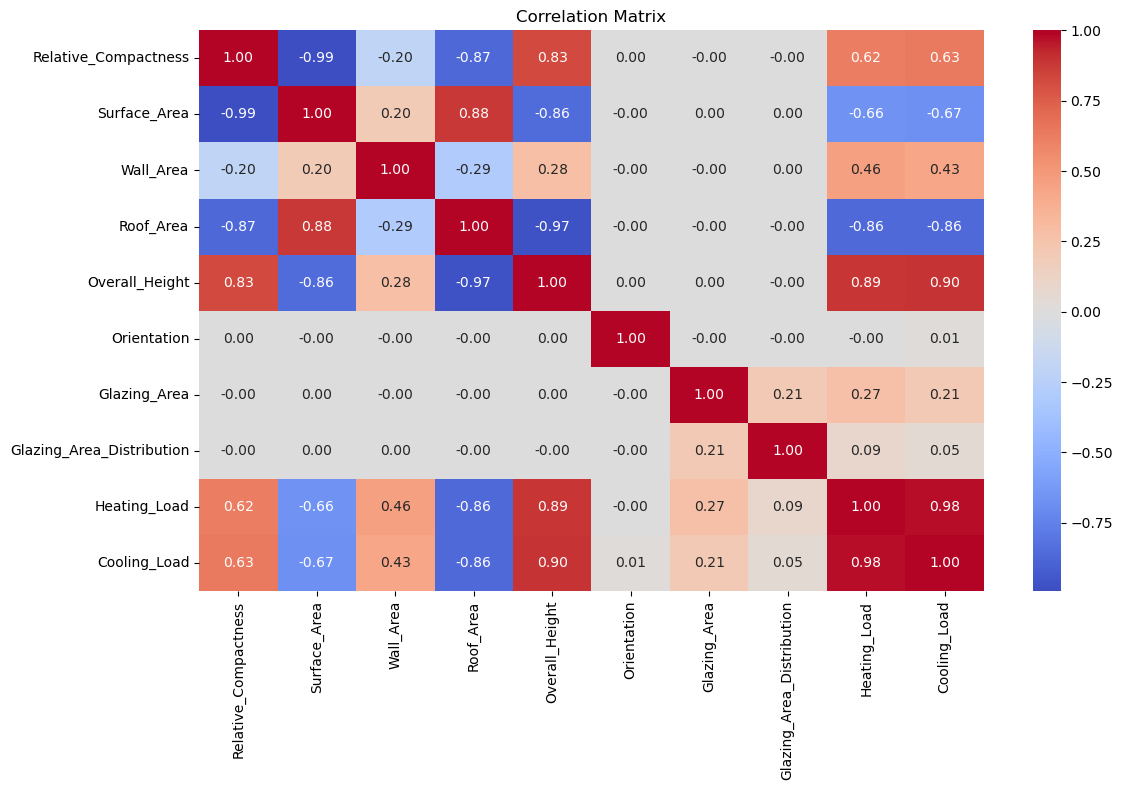


==================== Feature Analysis ====================
Shape: (768, 10)

First few rows:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0          2.0           0.0                        0.0         15.55   
1          3.0           0.0                        0.0         15.55   
2          4.0           0.0                        0.0         15.55   
3          5.0           0.0                        0.0         15.55   
4          2.0           0.0                        0.0         20

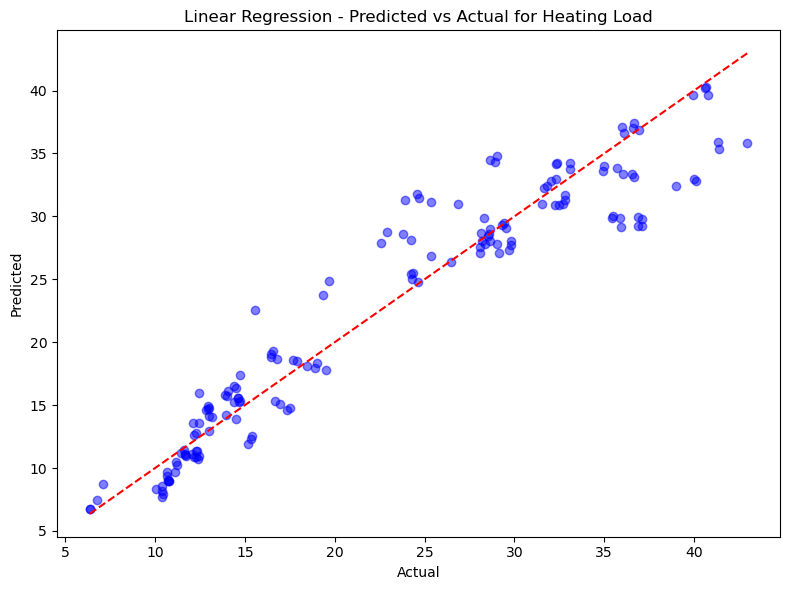

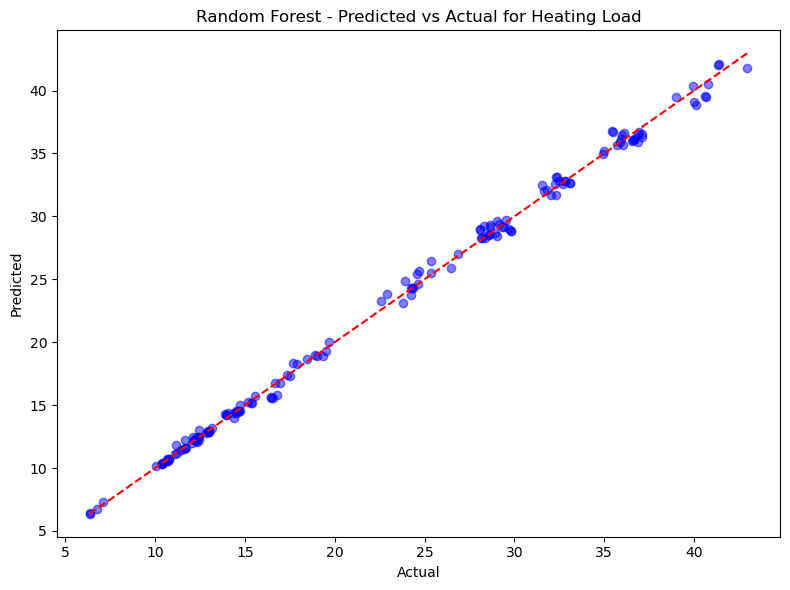


[Step 4: Model Training and Evaluation for Cooling Load]

Results for Cooling Load:

Linear Regression:
R² Score: 0.8932
RMSE: 3.1454

Random Forest:
R² Score: 0.9679
RMSE: 1.7256


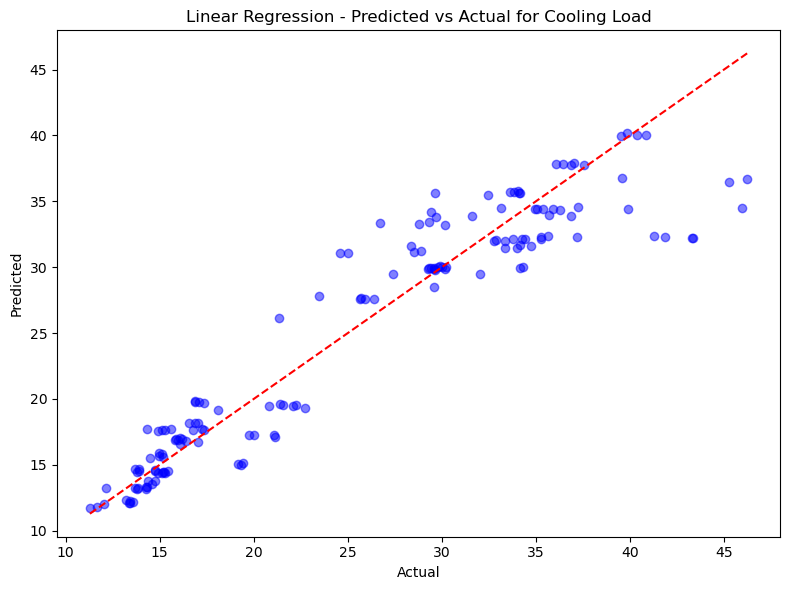

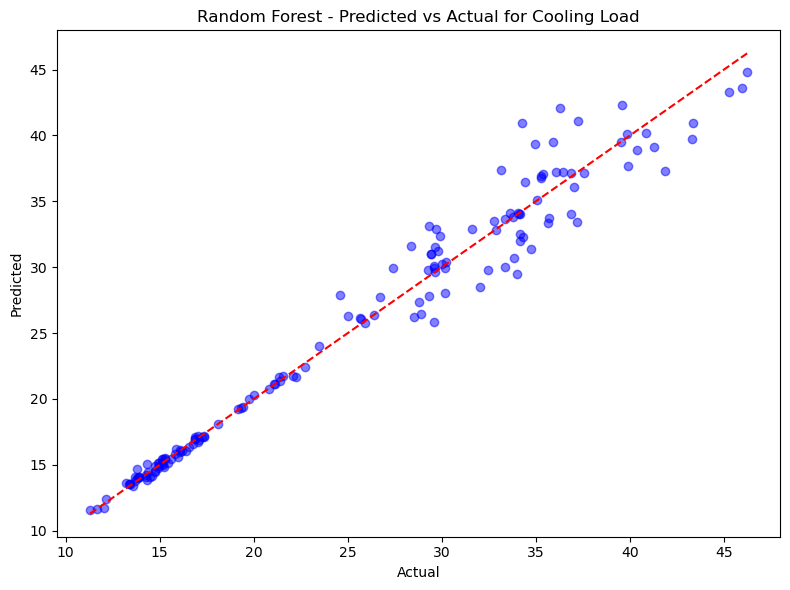

In [8]:
def main():
    # Step 1: Load and inspect data
    df = load_and_inspect_data('energy_efficiency_data.csv')

    # Step 2: Analyze features (correlation matrix included here)
    df = analyze_features(df)

    # Step 3: Prepare data
    (X_train_scaled, X_test_scaled, y_heat_train, y_heat_test,
     y_cool_train, y_cool_test, scaler) = prepare_data(df)

    # Step 4: Train and evaluate models
    # Heating Load
    lr_heat, rf_heat = train_and_evaluate_models(
        X_train_scaled, X_test_scaled, y_heat_train, y_heat_test, "Heating Load"
    )
    
    # Cooling Load
    lr_cool, rf_cool = train_and_evaluate_models(
        X_train_scaled, X_test_scaled, y_cool_train, y_cool_test, "Cooling Load"
    )

if __name__ == "__main__":
    main()

### General Overview

The data includes 768 observations and 10 features, each describing various characteristics of buildings, such as their physical dimensions and energy characteristics. Below are the key insights:

- **Relative Compactness**: Mean: 0.76 (high relative compactness of buildings). Range: Between 0.62 and 0.98. Most buildings have a compact shape (closer to 1). Standard Deviation (std): 0.11, indicating a relatively low spread of values around the mean.

- **Surface Area**: Mean: 671.71 square units. Range: 514.5 to 808.5 square units. Standard Deviation (std): 88.09, suggesting considerable variation in building sizes.

- **Wall Area**: Mean: 318.5 square units. Range: 245 to 416.5 square units. Std: 43.63, indicating some variation in wall areas across buildings.

- **Roof Area**: Mean: 176.6 square units. Range: 110.25 to 220.5 square units. Std: 45.17, showing moderate variation in roof sizes-.

- **Overall Height**: Mean: 5.25 meters. Range: 3.5 to 7 meters. Std: 1.75, reflecting significant variability in building height.

- **Orientation**: Mean: 3.5, indicating a somewhat even distribution of building orientations. Std: 1.12, showing moderate variation in orientation.

- **Glazing Area**: Mean: 0.23, showing a low average amount of glazed area (likely windows). Range: 0 to 0.4, with values spread across a narrow range. Std: 0.13, showing some variance.

- **Heating and Cooling Load**: Heating Load Mean: 22.31 units with a range from 6.01 to 43.1. Cooling Load Mean: 24.59 units with a range from 10.9 to 48.03. These statistics indicate the energy efficiency of buildings and their demand for heating and cooling.                                                                                                                                                                                                                               
                                                                                                                                                                                                                                      
#### Key Correlations:

- Surface Area vs Relative Compactness: Strong negative correlation of -0.99. This suggests that as surface area increases, relative compactness decreases, meaning that larger buildings tend to be less compact in shape.
- Roof Area vs Surface Area: Strong positive correlation (0.88). Larger buildings have larger roofs.
- Overall Height vs Roof Area: Strong negative correlation (-0.97). Taller buildings tend to have smaller roofs, likely due to the design constraints.
- Heating Load vs Overall Height: Strong positive correlation (0.89). Taller buildings require more heating.
- Cooling Load vs Overall Height: Strong positive correlation (0.90). Similar to heating, taller buildings likely need more cooling.
- Heating and Cooling Load are highly correlated (0.98), indicating that buildings that require more heating also tend to require more cooling.
- Glazing Area and Glazing Area Distribution: Moderate correlation (0.21), suggesting that buildings with more glazing tend to have a higher distribution of glazing across the facade.

## Conclusion

This project demonstrated the potential of using machine learning models to predict the heating and cooling load of buildings based on their physical and energy characteristics. The Random Forest Regressor performed exceptionally well, highlighting the importance of certain features like surface area and building height. Further improvements could include refining the models by integrating additional data, such as building insulation or local climate factors.